In [2]:
### Developed by Prabhash Kumar Jha and Isheeta Jha ###

import numpy as np
import matplotlib.pyplot as plt


file = open("iris.txt","r")

sepal_length=[]
sepal_width=[]
petal_length=[]
petal_width=[]
label=[]

#Repeat for each song in the text file
for line in file:
  
  #Let's split the line into an array called "fields" using the "," as a separator:
    fields = line.split(",")
  
  #and let's extract the data:
    sepal_length= np.append(sepal_length,float(fields[0]))
    sepal_width=np.append(sepal_width,float(fields[1]))
    petal_length=np.append(petal_length,float(fields[2]))
    petal_width=np.append(petal_width,float(fields[3]))
    label=np.append(label,float(fields[4]))

file.close()

sepal_length=(sepal_length-np.mean(sepal_length))/np.std(sepal_length)  # normalise to make mean zero and variance unit
sepal_width=(sepal_width-np.mean(sepal_width))/np.std(sepal_width)
petal_length=(petal_length-np.mean(petal_length))/np.std(petal_length)
petal_width=(petal_width-np.mean(petal_width))/np.std(petal_width)

sepal=[sepal_length,sepal_width,petal_length,petal_width]  ##array of array with all nomalised data


X=np.vstack(( sepal_length,sepal_width,petal_length,petal_width ))
# we need all feature of one flower in one colum so we need to transpose the matrix
X=X.T

## X arrangement    row1= feature1 row2= feature 2 and so on

mean = np.mean(X, axis=0)
cov = (X - mean).T.dot((X - mean)) / (X.shape[0]-1)
#print('Covariance matrix \n%s' %cov)



eigen_values, eigen_vectors=np.linalg.eig(cov)
#display(X)



Text(0.5,1,'Percentage Variance of Various Principal Components')

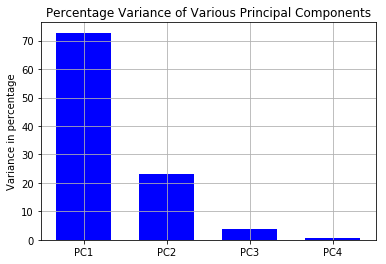

In [143]:

eigen_values=eigen_values/np.sum(eigen_values)
eigen_values=eigen_values*100
N = len(eigen_values)
x = range(N)
width = 1/1.5
plt.bar(x, eigen_values, width, color="blue")
#ax.set_xticklabels(['PC1', 'PC2', 'PC3','PC4'])
plt.ylabel('Variance in percentage')
plt.grid(True, which='both') 
plt.xticks(x,['PC1', 'PC2', 'PC3','PC4'])
plt.title("Percentage Variance of Various Principal Components")
## 2 dimensions required



In [4]:
low_dim =eigen_vectors[:,[0,1]]  ## get the first two dimensions


In [5]:
projection = X.dot(low_dim)
#projection

No handles with labels found to put in legend.


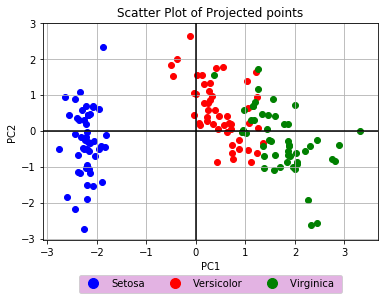

In [172]:
colors = ['red', 'blue', 'green']
import matplotlib.patches as mpatches



for i in range(150):
      plt.scatter( x=projection[i,0],y=projection[i,1],c=colors[int(label[i])])
     
        
plt.grid(True, which='both')        
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')  
plt.title("Scatter Plot of Projected points")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()

colors = ["b", "r","g"]
texts = ["Setosa", "Versicolor", "Virginica "]
patches = [ plt.plot([],[], marker="o", ms=10, ls="", mec=None, color=colors[i], 
            label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]
plt.legend(handles=patches, bbox_to_anchor=(.5, -0.2), 
           loc='center', ncol=3, facecolor="plum", numpoints=1 )



In [173]:
### lets try to recreate original dataset using 1 to 4 Principal components and see what RMSE we get###
for j in range(4):
    low_dim =eigen_vectors[:,0:j+1]   # 1 to 4 Principal components
    projection = X.dot(low_dim)
    recreate = projection.dot(low_dim.T)
    recreate= recreate.T # to visualise each data point vertically

    for i in range(4):

        recreate_sepal=recreate[i]
        recreate_sepal=(recreate_sepal+np.mean(sepal[i]))*np.std(sepal[i])
        RMSE= np.square(recreate_sepal-sepal[i]) 
        RMSE= np.sum(RMSE)/(150)
        RMSE=np.sqrt(RMSE)
        RMSE=RMSE/(np.max(sepal[i])-np.min(sepal[i]))
        display(RMSE)

0.10397936254433657

0.16086195802504247

0.03835783289625219

0.08311764930833636

0.06403369013562482

0.017034097251625573

0.03788015252831201

0.080700682028687

0.008622214802836009

0.003208693693666757

0.03427903263731104

0.023818927004175778

2.532182523238007e-16

1.332128149946015e-16

1.7667702374138336e-16

1.1604312368310158e-16